In [4]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 

# Loading the Dataset
df = pd.read_csv("D:/python/spam.csv",encoding = "latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# Shape of the Dataset
df.shape

(5572, 5)

## Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Dropping the unwanted Columns

# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
# New Df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [10]:
# Renaming the Columns
df.rename(columns = {"v1" : "target","v2" : "text"},inplace = True)

In [11]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Label Encoder 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df["target"] =  encoder.fit_transform(df["target"])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# Counting the Number of the different number of ham and spam
from collections import Counter
Counter(df["target"])

## 0 - Not Spam ,1 - Spam

Counter({0: 4825, 1: 747})

In [15]:
# Checking for the null and the duplicated values
df.isna().sum()

target    0
text      0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:
# Removing the Duplicated Terms
df.drop_duplicates(keep = "first")

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

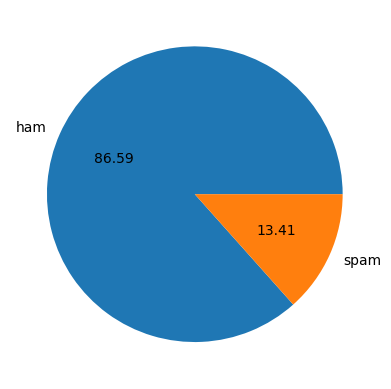

In [20]:
# Pie Plot
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct = "%0.2f")
plt.show()

In [21]:
## Imbalanced Data


In [22]:
# NLTK library
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\td334\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\td334\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
# Each number of characters a single text contains.
df["num_characters"] = df["text"].apply(len)

df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# Calculate the num of words inside the text
df["num_words"] = df.text.apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
# Number of sentences in side a particular text
df["num_sentences"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
# Statistical Inference
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# Spam
df[df["target"] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

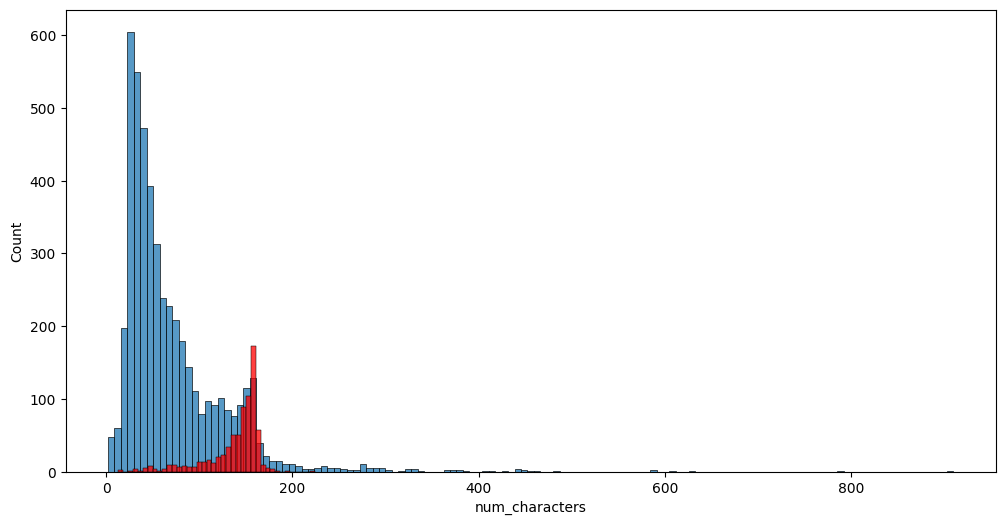

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

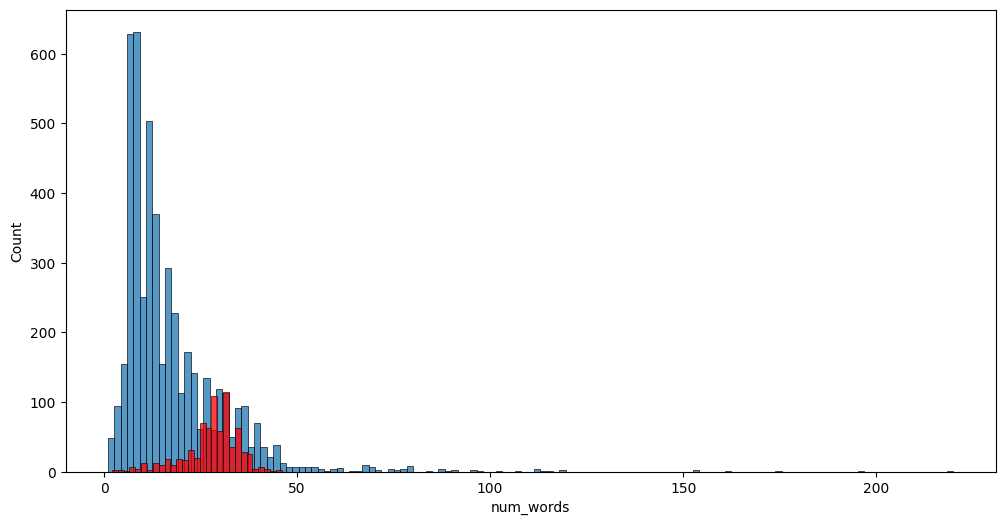

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

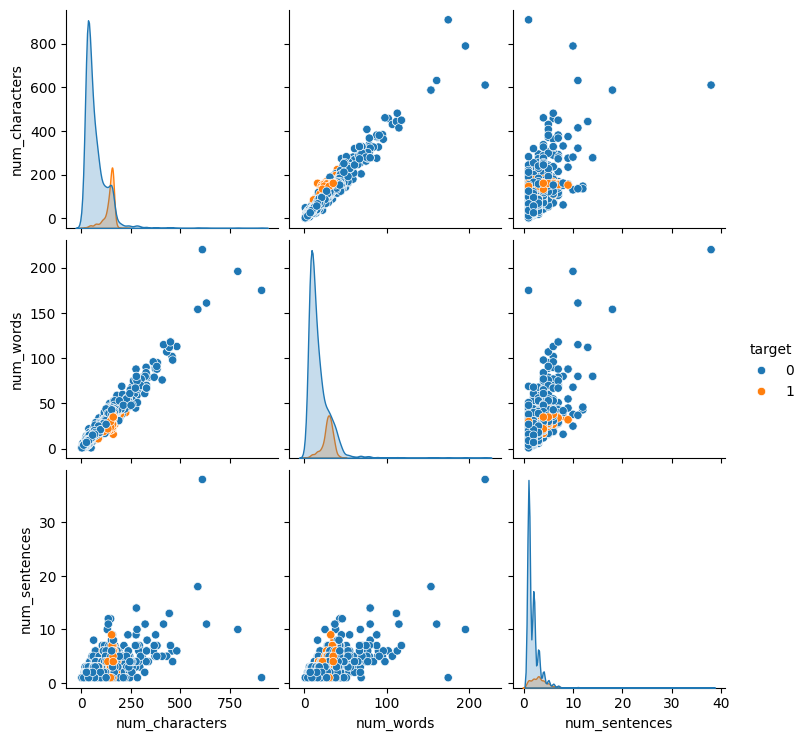

In [34]:
sns.pairplot(df,hue='target')

## Data Preprocessing

In [35]:
# Importing the NLTK Libraries
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    # Cloning the y
    text = y[:]
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


In [36]:
# Applying the Transform Text into the text column
df["transformed_text"] = df["text"].apply(transform_text)

In [37]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say u dun say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though nah thi...


In [38]:

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [39]:
len(spam_corpus)

22980

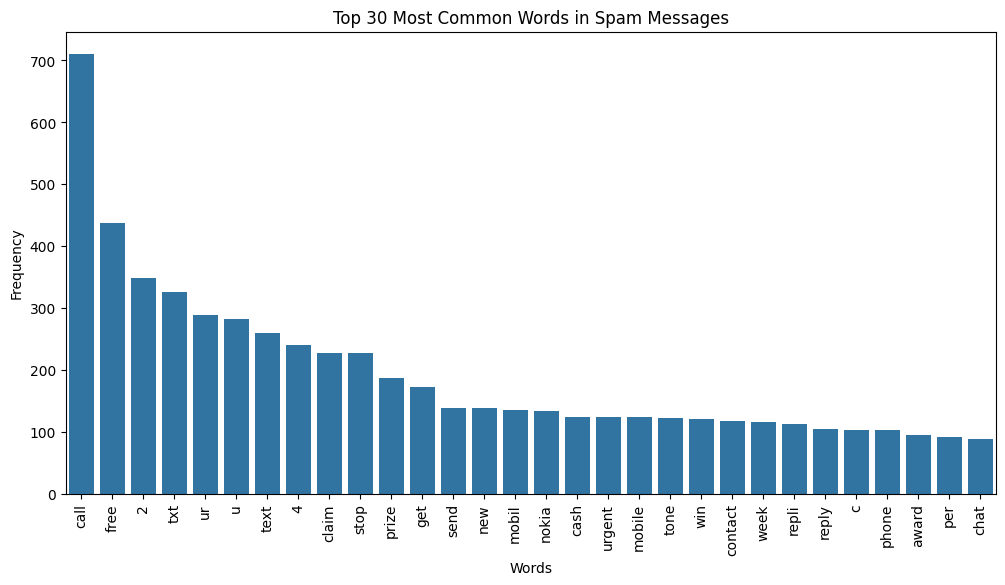

In [40]:
from collections import Counter
# Assuming spam_corpus is a list of words from spam messages
word_counts = Counter(spam_corpus).most_common(30)
df_wc = pd.DataFrame(word_counts, columns=['Word', 'Frequency'])

# Set figure size
plt.figure(figsize=(12, 6))

# Corrected sns.barplot() call
sns.barplot(data=df_wc, x="Word", y="Frequency")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)  # Using 90 degrees for vertical alignment
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Most Common Words in Spam Messages")

# Show the plot
plt.show()

In [41]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [42]:
len(ham_corpus)

76442

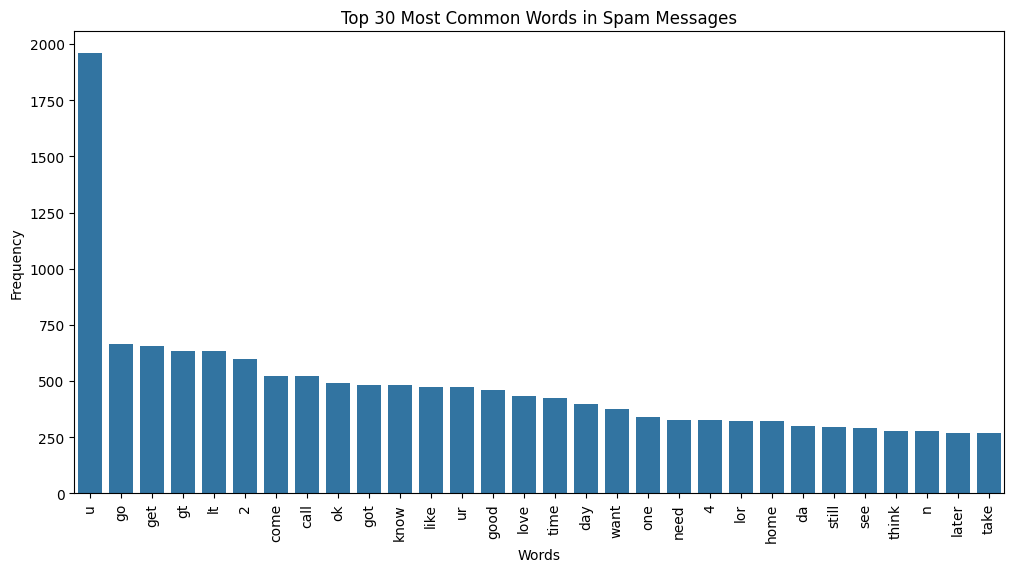

In [43]:
# Assuming spam_corpus is a list of words from spam messages
word_counts = Counter(ham_corpus).most_common(30)
df_wc = pd.DataFrame(word_counts, columns=['Word', 'Frequency'])

# Set figure size
plt.figure(figsize=(12, 6))

# Corrected sns.barplot() call
sns.barplot(data=df_wc, x="Word", y="Frequency")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)  # Using 90 degrees for vertical alignment
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Most Common Words in Spam Messages")

# Show the plot
plt.show()

In [44]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say u dun say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though nah thi...


## Model Building

In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [46]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [47]:
X.shape

(5572, 3000)

In [48]:
y = df["target"]

In [49]:
y.shape

(5572,)

In [50]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [51]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [52]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8699551569506726
[[842 115]
 [ 30 128]]
0.5267489711934157


In [53]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9695067264573991
[[957   0]
 [ 34 124]]
1.0


In [54]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9757847533632287
[[953   4]
 [ 23 135]]
0.9712230215827338


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [56]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [57]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [58]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [59]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.967713004484305, 0.9765625)

In [60]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.967713004484305
Precision -  0.9765625
For  KN
Accuracy -  0.905829596412556
Precision -  1.0
For  NB
Accuracy -  0.9695067264573991
Precision -  1.0
For  DT
Accuracy -  0.9219730941704036
Precision -  0.865979381443299
For  LR
Accuracy -  0.9497757847533632
Precision -  0.9553571428571429
For  RF
Accuracy -  0.967713004484305
Precision -  0.9919354838709677
For  AdaBoost
Accuracy -  0.915695067264574
Precision -  0.9
For  BgC
Accuracy -  0.9587443946188341
Precision -  0.9307692307692308
For  ETC
Accuracy -  0.9704035874439462
Precision -  1.0
For  GBDT
Accuracy -  0.9390134529147982
Precision -  0.95
For  xgb
Accuracy -  0.9623318385650225
Precision -  0.9754098360655737


In [61]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [62]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905830,1.000000
2,NB,0.969507,1.000000
8,ETC,0.970404,1.000000
5,RF,0.967713,0.991935
0,SVC,0.967713,0.976562
10,xgb,0.962332,0.975410
4,LR,0.949776,0.955357
9,GBDT,0.939013,0.950000
7,BgC,0.958744,0.930769
6,AdaBoost,0.915695,0.900000


In [63]:

performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905830
1,NB,Accuracy,0.969507
2,ETC,Accuracy,0.970404
3,RF,Accuracy,0.967713
4,SVC,Accuracy,0.967713
5,xgb,Accuracy,0.962332
6,LR,Accuracy,0.949776
7,GBDT,Accuracy,0.939013
8,BgC,Accuracy,0.958744
9,AdaBoost,Accuracy,0.915695


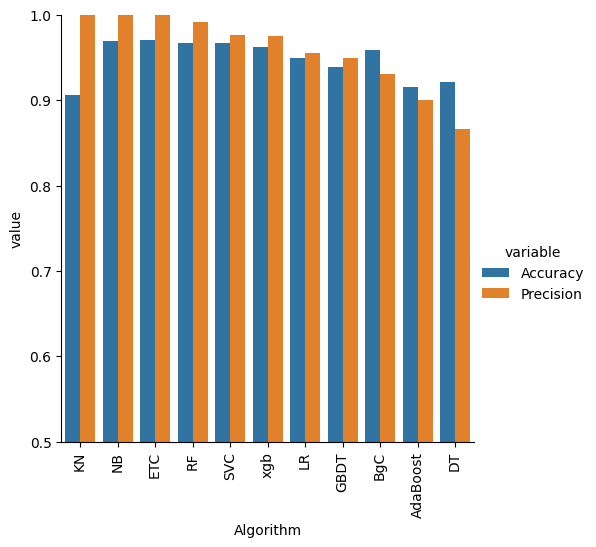

In [64]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [65]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [66]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [67]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [68]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905830,1.000000,0.905830,1.000000,0.905830,1.000000,0.905830,1.000000
1,NB,0.969507,1.000000,0.969507,1.000000,0.969507,1.000000,0.969507,1.000000
2,ETC,0.970404,1.000000,0.970404,1.000000,0.970404,1.000000,0.970404,1.000000
3,RF,0.967713,0.991935,0.967713,0.991935,0.967713,0.991935,0.967713,0.991935
4,SVC,0.967713,0.976562,0.967713,0.976562,0.967713,0.976562,0.967713,0.976562
5,xgb,0.962332,0.975410,0.962332,0.975410,0.962332,0.975410,0.962332,0.975410
6,LR,0.949776,0.955357,0.949776,0.955357,0.949776,0.955357,0.949776,0.955357
7,GBDT,0.939013,0.950000,0.939013,0.950000,0.939013,0.950000,0.939013,0.950000
8,BgC,0.958744,0.930769,0.958744,0.930769,0.958744,0.930769,0.958744,0.930769
9,AdaBoost,0.915695,0.900000,0.915695,0.900000,0.915695,0.900000,0.915695,0.900000


In [69]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [70]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [71]:

y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

"""A Voting Classifier is useful when it's difficult to choose the best model, so instead of selecting just one, it combines multiple models to make a better overall prediction. This helps balance out the weaknesses of individual models and improves accuracy and stability."""

Accuracy 0.9739910313901345
Precision 0.9923664122137404


"A Voting Classifier is useful when it's difficult to choose the best model, so instead of selecting just one, it combines multiple models to make a better overall prediction. This helps balance out the weaknesses of individual models and improves accuracy and stability."

In [72]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [73]:
from sklearn.ensemble import StackingClassifier

In [74]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9766816143497757
Precision 0.9583333333333334


In [76]:
from sklearn.utils.validation import check_is_fitted
from sklearn.naive_bayes import MultinomialNB

# Assuming your model variable is `mnb`
try:
    check_is_fitted(mnb)
    print("✅ Model is trained and ready!")
except:
    print("❌ Model is NOT trained! Run .fit(X_train, y_train) before saving.")


❌ Model is NOT trained! Run .fit(X_train, y_train) before saving.


In [79]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say u dun say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though nah thi...


In [80]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample dataset (Replace with your actual dataset)
X_train = df.drop("target", axis=1)["text"]
y_train = df["target"]  # 1 = Spam, 0 = Ham

# Convert text into numerical features
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)

# Train the model
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)  # This step is CRUCIAL

MultinomialNB()

In [81]:
# Saving the model
import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))